# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




1.Realice un análisis exploratorio del conjunto de datos.

In [3]:
def resumen_por_columnas(df,cols):
    pd_series = df[cols]
    l_unique = pd_series.unique()
    l_vacios = pd_series[pd_series.isna()]
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    return df_info

In [4]:
frames = []
for col in df.columns:
    aux_df = resumen_por_columnas(df, col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(df)
df_info

,columna,unicos,vacios,% vacios
0,id,569,0,0.0
1,diagnosis,2,0,0.0
2,radius_mean,456,0,0.0
3,texture_mean,479,0,0.0
4,perimeter_mean,522,0,0.0
5,area_mean,539,0,0.0
6,smoothness_mean,474,0,0.0
7,compactness_mean,537,0,0.0
8,concavity_mean,537,0,0.0
9,concave points_mean,542,0,0.0


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

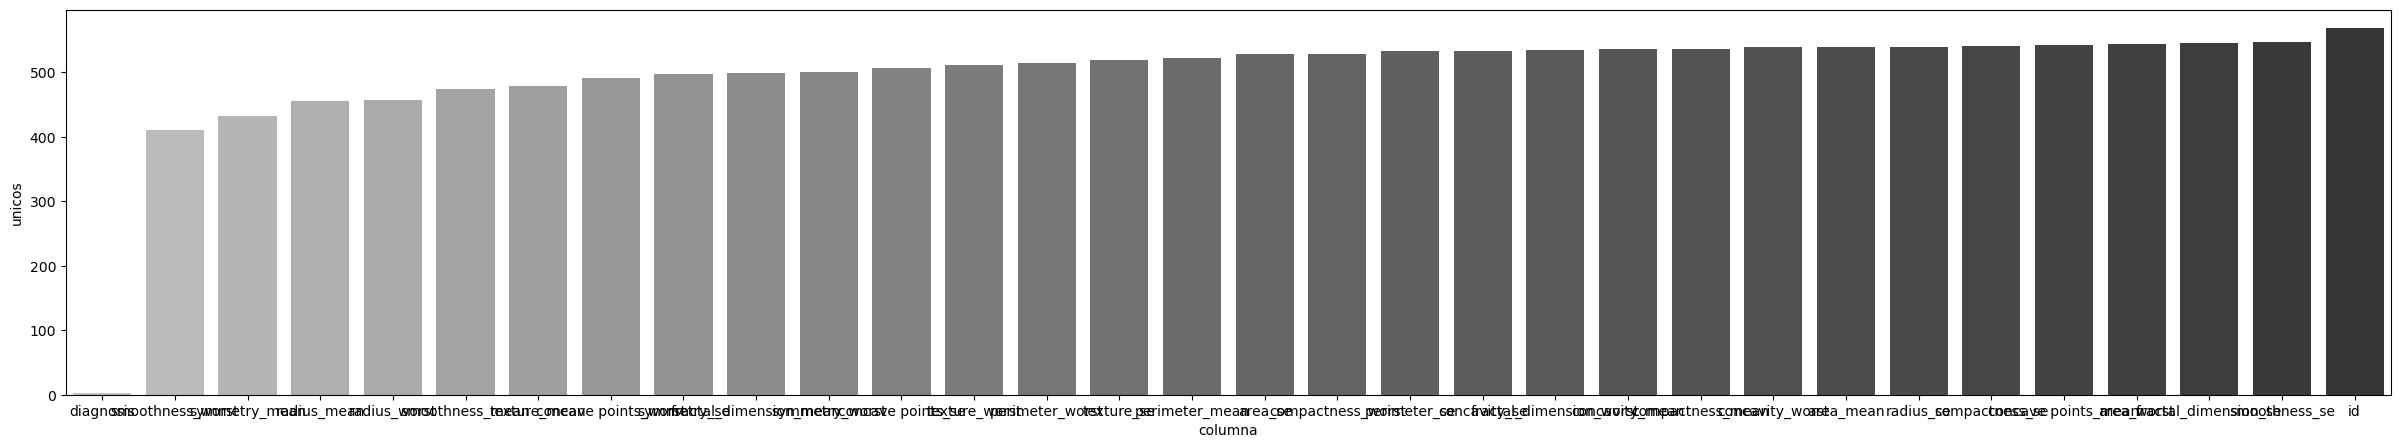

In [5]:
plt.style.use('default')
plt.figure(figsize=(30,5))

plotting = sns.barplot(
    x="columna",
    y="unicos",
    data=df_info.sort_values('unicos'),
    palette="Greys_d",
    linewidth=3
)

for container in plotting.containers:
    plotting.bar_label(container,fontsize=1)

plt.title("Valores Distintos")
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)

plt.show()

2.Normalizar las variables numéricas con el método StandardScaler.

In [ ]:
x = df.loc[:, df.drop(['diagnosis', 'id'], axis=1).columns].values
y = df.loc[:, ['diagnosis']].values

x = StandardScaler().fit_transform(x)

3.Realizar un método de reducción de dimensionalidad visto en clases.

In [ ]:
columns = []

for i in range(1,11):
    st = 'PC'
    st = 'PC'+str(i)
    columns.append(st)

In [ ]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

percent_variance = np.round(pca.explained_variance_ratio_*100, decimals=2)

plt.figure(figsize=(12,4))
plt.bar(x=range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of variance explained')
plt.xlabel('Principal component')
plt.title('PCA scree plot')
plt.show()

In [ ]:
string = 'PC1'
columns_2 = [str]

for i in range(1,len(columns)):
    string = string + '+' + columns[i]
    columns_2.append(string)

In [ ]:
percent_variance_cum = np.cumsum(percent_variance)

plt.figure(figsize=(12,4))
plt.bar(x=range(1,11), height = percent_variance_cum, tick_label = columns_2)
plt.ylabel('Percentate of variance explained')
plt.xlabel('Principal component cumsum')
plt.title('PCA scree plot')
plt.show()

In [ ]:
percent_variance_cum

In [ ]:
columns[:7]

In [ ]:
pca = PCA(n_components=7)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = columns[:7])
targetDataframe = df[['diagnosis']]

newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)
newDataframe.head()

4.Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import random
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(principalDataframe, targetDataframe, test_size=0.2, random_state=42)

SVC

In [ ]:
regr_1 = SVC()
regr_1.fit(X_train,Y_train)
target_names = ['clase 0', 'clase 1']
print(classification_report(Y_test, regr_1.predict(X_test), target_names=target_names))

In [ ]:
# rango de parametros
param_grid = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['linear', 'rbf']}
param_grid

In [ ]:
# aplicar greed search

gs1 = GridSearchCV(SVC(), 
                  param_grid, refit = True, verbose=2)

gs1 = gs1.fit(X_train, Y_train)

In [ ]:
gs1.best_params_

In [ ]:
print(classification_report(Y_test, gs1.predict(X_test), target_names=target_names))

Decision Tree

In [ ]:
regr_2 = tree.DecisionTreeClassifier()
regr_2.fit(X_train, Y_train)
target_names = ['clase 0', 'clase 1']
print(classification_report(Y_test, regr_2.predict(X_test), target_names=target_names))

In [ ]:
# rango de parametros
param_grid2 = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,70,90,120,150], 'criterion':['gini', 'entropy']}

In [ ]:
# aplicar greed search

gs2 = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid2, cv=5, verbose=True)

gs2 = gs2.fit(X_train, Y_train)

In [ ]:
print(gs2.best_score_)
print(gs2.best_params_)

In [ ]:
mejor_modelo = gs2.best_estimator_
mejor_modelo.fit(X_train, Y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo.score(X_test, Y_test)))

In [ ]:
print(classification_report(Y_test, gs2.predict(X_test), target_names=target_names))

Logistic Regression

In [ ]:
regr_3 = LogisticRegression()
regr_3.fit(X_train, Y_train)
target_names = ['clase 0', 'clase 1']
print(classification_report(Y_test, regr_3.predict(X_test), target_names=target_names))

In [ ]:
# rango de parametros
param_grid3 = {'C':np.logspace(-3,3,7), 'penalty': ['l1','l2']} #l1 lasso y l2 ridge

In [ ]:
# aplicar greed search

gs3 = GridSearchCV(regr_3, param_grid3, cv=10)

gs3 = gs3.fit(X_train, Y_train)

In [ ]:
print(gs3.best_score_)
print(gs3.best_params_)

In [ ]:
print(classification_report(Y_test, gs3.predict(X_test), target_names=target_names))